In [ ]:
import os
import sys
import numpy as np
import polars as pl

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(notebook_dir)



project_path = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding"
model = "FOXA1"
sample = "22Rv1"
jaspar_file = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/{model}.jaspar"  # Update this path
ground_truth_file = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/data/transcription_factors/FOXA1/merged/22RV1_FOXA1_merged.bed"

df = pl.read_parquet(project_path + "/data/processed_results/" + model + "_" + sample + "_processed.parquet", 
                    columns=["chr_name", "start", "end", "cell_line", "targets", "predicted", "weights", "probabilities", "attributions"],
                    # low_memory=True,                        # Reduce memory usage
                    parallel="columns",                     # Enable parallel reading
                    use_statistics=True,                    # Use parquet statistics
                    memory_map=True).lazy()                         # Use memory mapping
df = df.rename({"chr_name": "chr"})
df


chr,start,end,cell_line,targets,predicted,weights,probabilities,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]]
"""chr8""",37573151,37573540,"""22Rv1""",-1.0,0.0,-1.0,0.000551,"[[0.0, 0.0, … 0.0045], [0.0, 0.0, … 0.004494], … [0.0, 0.0, … 0.00271]]"
"""chr8""",133171276,133171803,"""22Rv1""",-1.0,0.0,-1.0,0.244165,"[[0.0, 0.0, … 0.001865], [0.10027, 0.0, … 0.001424], … [0.0, 0.0, … 0.000104]]"
"""chr7""",47548049,47548463,"""22Rv1""",-1.0,0.0,-1.0,0.002628,"[[0.0, 0.0, … 0.00502], [0.0, 0.0, … 0.004243], … [0.0, 0.0, … -0.000241]]"
"""chr22""",48497772,48498172,"""22Rv1""",-1.0,0.0,-1.0,0.000124,"[[0.0, 0.0, … -0.000216], [0.0, 0.0, … -0.000285], … [0.0, 0.0, … 0.000751]]"
"""chr16""",11676447,11677626,"""22Rv1""",-1.0,0.0,-1.0,0.148766,"[[0.0, 0.0, … 0.000251], [0.0, 0.0, … 0.000136], … [0.0, 0.0, … -0.002722]]"
…,…,…,…,…,…,…,…,…
"""chr3""",115072575,115072962,"""22Rv1""",-1.0,1.0,-1.0,0.990252,"[[0.0, 0.0, … 0.000917], [-0.003755, 0.010534, … 0.001443], … [0.0, 0.0, … 0.000053]]"
"""chr5""",5497296,5497687,"""22Rv1""",-1.0,0.0,-1.0,0.440429,"[[0.0, 0.0, … -0.000943], [-0.049586, 0.050422, … -0.000364], … [0.0, 0.0, … -0.005175]]"
"""chr13""",110593391,110594049,"""22Rv1""",-1.0,1.0,-1.0,0.838873,"[[0.0, 0.0, … -0.000088], [-0.048449, 0.035886, … -0.000235], … [0.0, 0.0, … -0.000622]]"


In [2]:
df = df.lazy()

In [5]:
import os
import tempfile
import polars as pl
from src.utils.generate_training_peaks import run_bedtools_command

def intersect_bed_files(main_df: pl.LazyFrame, intersect_df: pl.DataFrame, region_type: str = None) -> pl.LazyFrame:
    """
    Intersect two BED files using bedtools and return the original DataFrame with overlap flags.
    Args:
    main_df: Primary Polars DataFrame with BED data
    intersect_df: Secondary Polars DataFrame to intersect with
    region_type: Optional region type label to add to results
    Returns:
    Original DataFrame with additional column indicating overlaps
    """
    # Get column names from schema
    main_cols = main_df.schema.keys()
    
    with tempfile.NamedTemporaryFile(delete=False, mode='w') as main_file, \
         tempfile.NamedTemporaryFile(delete=False, mode='w') as intersect_file, \
         tempfile.NamedTemporaryFile(delete=False, mode='w') as result_file:
        main_path = main_file.name
        intersect_path = intersect_file.name
        result_path = result_file.name
        
        # Write DataFrames to temporary files - collect LazyFrame first
        main_df.collect().write_csv(main_path, separator="\t", include_header=False)
        intersect_df.write_csv(intersect_path, separator="\t", include_header=False)
        
        # Run bedtools intersect with -c flag to count overlaps
        command = f"bedtools intersect -a {main_path} -b {intersect_path} -c > {result_path}"
        run_bedtools_command(command)
        
        # Read results back into Polars DataFrame
        result_df = pl.read_csv(
            result_path,
            separator="\t",
            has_header=False,
            new_columns=[*main_cols, "overlap_count"]
        ).lazy()
        
        # Clean up temporary files
        os.remove(main_path)
        os.remove(intersect_path)
        os.remove(result_path)
        
        # Add boolean overlap column
        return result_df.with_columns(
            pl.col("overlap_count").gt(0).alias("overlaps_ground_truth")
        ).drop("overlap_count")

HIGH_COUNT_QUANTILE = 0.75
MAX_COUNT_THRESHOLD = 30
MID_COUNT_THRESHOLD = 10

def threshold_peaks(df):
    """
    Filter peaks based on count thresholds.
    Works with both DataFrame and LazyFrame.
    """
    # Handle scalar operations safely
    def get_scalar(expr):
        if isinstance(df, pl.LazyFrame):
            return expr.collect().item()
        return expr.item()
    
    max_count = get_scalar(df.select(pl.col("count").max()))
    
    if max_count <= 2:
        return df
    elif max_count > MAX_COUNT_THRESHOLD:
        threshold = get_scalar(df.select(pl.col("count").quantile(HIGH_COUNT_QUANTILE)))
        return df.filter(pl.col("count") > threshold)
    elif max_count > MID_COUNT_THRESHOLD:
        threshold = get_scalar(df.select(pl.col("count").median()))
        return df.filter(pl.col("count") > threshold)
    
    return df

# Usage example:
df_ground_truth = pl.read_csv(ground_truth_file,
                             separator="\t",
                             has_header=False,
                             new_columns=["chr", "start", "end", "count"],
                             columns=[0,1,2,3])

df_ground_truth_filtered = threshold_peaks(df_ground_truth)

# Use select() instead of subscripting
intersected_df = intersect_bed_files(df.select(["chr", "start", "end"]), df_ground_truth_filtered)

# add overlaps ground truth to df from intersected_df
ground_truth_df = df.join(intersected_df, on=["chr", "start", "end"], how="left")

# add overlaps_ground_truth to df under targets, 1 if overlaps_ground_truth is true, 0 otherwise
ground_truth_df = ground_truth_df.with_columns(
    pl.when(pl.col("overlaps_ground_truth")).then(1).otherwise(0).alias("targets")
)

/tmp/ipykernel_121185/2919841671.py:17: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  main_cols = main_df.schema.keys()


In [9]:
# Step 1: Keep the filtering lazy until collection
df_positive = ground_truth_df.filter(pl.col("targets") == 1).collect()
df_negative_all = ground_truth_df.filter(pl.col("targets") == 0).collect()

# Step 2: Get the count of positive samples
pos_count = len(df_positive)

# Step 3: Sample from the materialized negative DataFrame
df_negative = df_negative_all.sample(n=min(pos_count, len(df_negative_all)), seed=42)

# Step 4: Concatenate the two DataFrames
df_balanced = pl.concat([df_positive, df_negative])

df_balanced

chr,start,end,cell_line,targets,predicted,weights,probabilities,attributions,overlaps_ground_truth
str,i64,i64,str,i32,f64,f64,f64,list[list[f64]],bool
"""chr13""",75120478,75120969,"""22Rv1""",1,1.0,-1.0,0.997128,"[[0.0, 0.0, … 0.000484], [0.064673, 0.0, … 0.000518], … [0.0, 0.0, … 0.000737]]",true
"""chr1""",170927586,170928161,"""22Rv1""",1,1.0,-1.0,0.992585,"[[0.0, 0.0, … 0.009379], [0.0, 0.0, … 0.011493], … [0.0, 0.0, … 0.029965]]",true
"""chr7""",37254595,37255303,"""22Rv1""",1,1.0,-1.0,0.871898,"[[0.0, 0.0, … 0.002747], [-0.095856, 0.0, … 0.003498], … [0.0, 0.0, … -0.004429]]",true
"""chr11""",90548984,90549588,"""22Rv1""",1,1.0,-1.0,0.995323,"[[0.0, 0.0, … 0.000105], [0.0, 0.013121, … 0.00016], … [0.0, 0.0, … -0.000157]]",true
"""chr4""",63280684,63281246,"""22Rv1""",1,0.0,-1.0,0.487332,"[[0.0, 0.0, … 0.00646], [0.0, 0.0, … 0.006864], … [0.0, 0.0, … 0.000302]]",true
…,…,…,…,…,…,…,…,…,…
"""chr9""",114746377,114747111,"""22Rv1""",0,1.0,-1.0,0.539374,"[[0.0, 0.0, … 0.004713], [0.048976, -0.046782, … 0.005419], … [0.0, 0.0, … 0.000051]]",false
"""chr1""",209600123,209600544,"""22Rv1""",0,0.0,-1.0,0.285179,"[[0.0, 0.0, … 0.000624], [0.059303, 0.0, … 0.000933], … [0.0, 0.0, … -0.004284]]",false
"""chr6""",2902907,2904063,"""22Rv1""",0,0.0,-1.0,0.00027,"[[0.0, 0.0, … 0.00018], [0.019721, 0.0, … 0.000672], … [0.0, 0.0, … -0.001827]]",false


In [10]:
def reshape_attributions(df):
    # Convert to numpy array first
    attributions = df['attributions'].values
    
    # Create empty array with correct shape
    n_samples = len(df)  # 46218
    reshaped = np.empty((n_samples, 4096, 5))
    
    # Fill the array by properly accessing each (5,) array
    for i, row in enumerate(attributions):
        for j, element in enumerate(row):
            reshaped[i, j] = element

    # Split into ACGT and ATAC components
    attrs_list = reshaped[..., :4].transpose(0, 2, 1)  # Shape: (n_samples, 4, 4096)
    atac_list = reshaped[..., 4]  # Shape: (n_samples, 4096)
            
    return attrs_list, atac_list

# Usage:
attrs_list, atac_list = reshape_attributions(df_positive.to_pandas())
print(f"Attrs shape: {attrs_list.shape}")
print(f"ATAC shape: {atac_list.shape}")

Attrs shape: (20434, 4, 4096)
ATAC shape: (20434, 4096)


In [11]:
# Import additional required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo
from tangermeme.seqlet import recursive_seqlets

# Get seqlets
def get_seqlets(attrs_list):
    attrs_array = np.stack(attrs_list, axis=0)
    seqlets = recursive_seqlets(attrs_array.sum(axis=1))
    
    nt_idx = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    
    # Add sequences to seqlets df
    sequences = []
    for i in range(len(seqlets)):
        sample = seqlets.iloc[i]
        start = int(sample['start'])
        end = int(sample['end'])
        sample_idx = int(sample['example_idx'])
        
        sample_attrs = attrs_array[sample_idx, :, start:end].T.squeeze()
        hits = np.argmax(sample_attrs, axis=1)
        seq = ''.join([nt_idx[i] for i in hits])
        sequences.append(seq)
    seqlets['sequence'] = sequences
    
    return seqlets

# Plot function (simplified version)
def plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=20):
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    plt.figure(figsize=(16, 9), dpi=300)
    ax = plt.subplot(111)
    plot_logo(
        X_attr,
        ax=ax,
        start=window[0],
        end=window[1]
    )
    
    plt.xlabel("Genomic Coordinate")
    plt.ylabel("Attributions")
    plt.title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    plt.show()

2025-02-26 12:09:20,952 - WARNING - Matplotlib is building the font cache; this may take a moment.


In [27]:
seqlets = get_seqlets(attrs_list)
filtered_seqlets = seqlets[seqlets["sequence"] == "AAAAA"]
filtered_seqlets

,example_idx,start,end,attribution,p-value,sequence
1160,12504,2138,2143,8.075346,0.000127,AAAAA
1341,18051,2195,2200,8.133771,0.000147,AAAAA
1423,6103,2051,2056,-3.905019,0.000154,AAAAA
1704,5772,1924,1929,-3.069986,0.000181,AAAAA
1984,827,2045,2050,-3.527737,0.000205,AAAAA
...,...,...,...,...,...,...
117109,1818,2078,2083,0.860540,0.009932,AAAAA
117116,1608,2214,2219,0.920266,0.009932,AAAAA
117119,4542,1772,1777,0.974728,0.009932,AAAAA
117140,19350,2106,2111,0.925306,0.009932,AAAAA


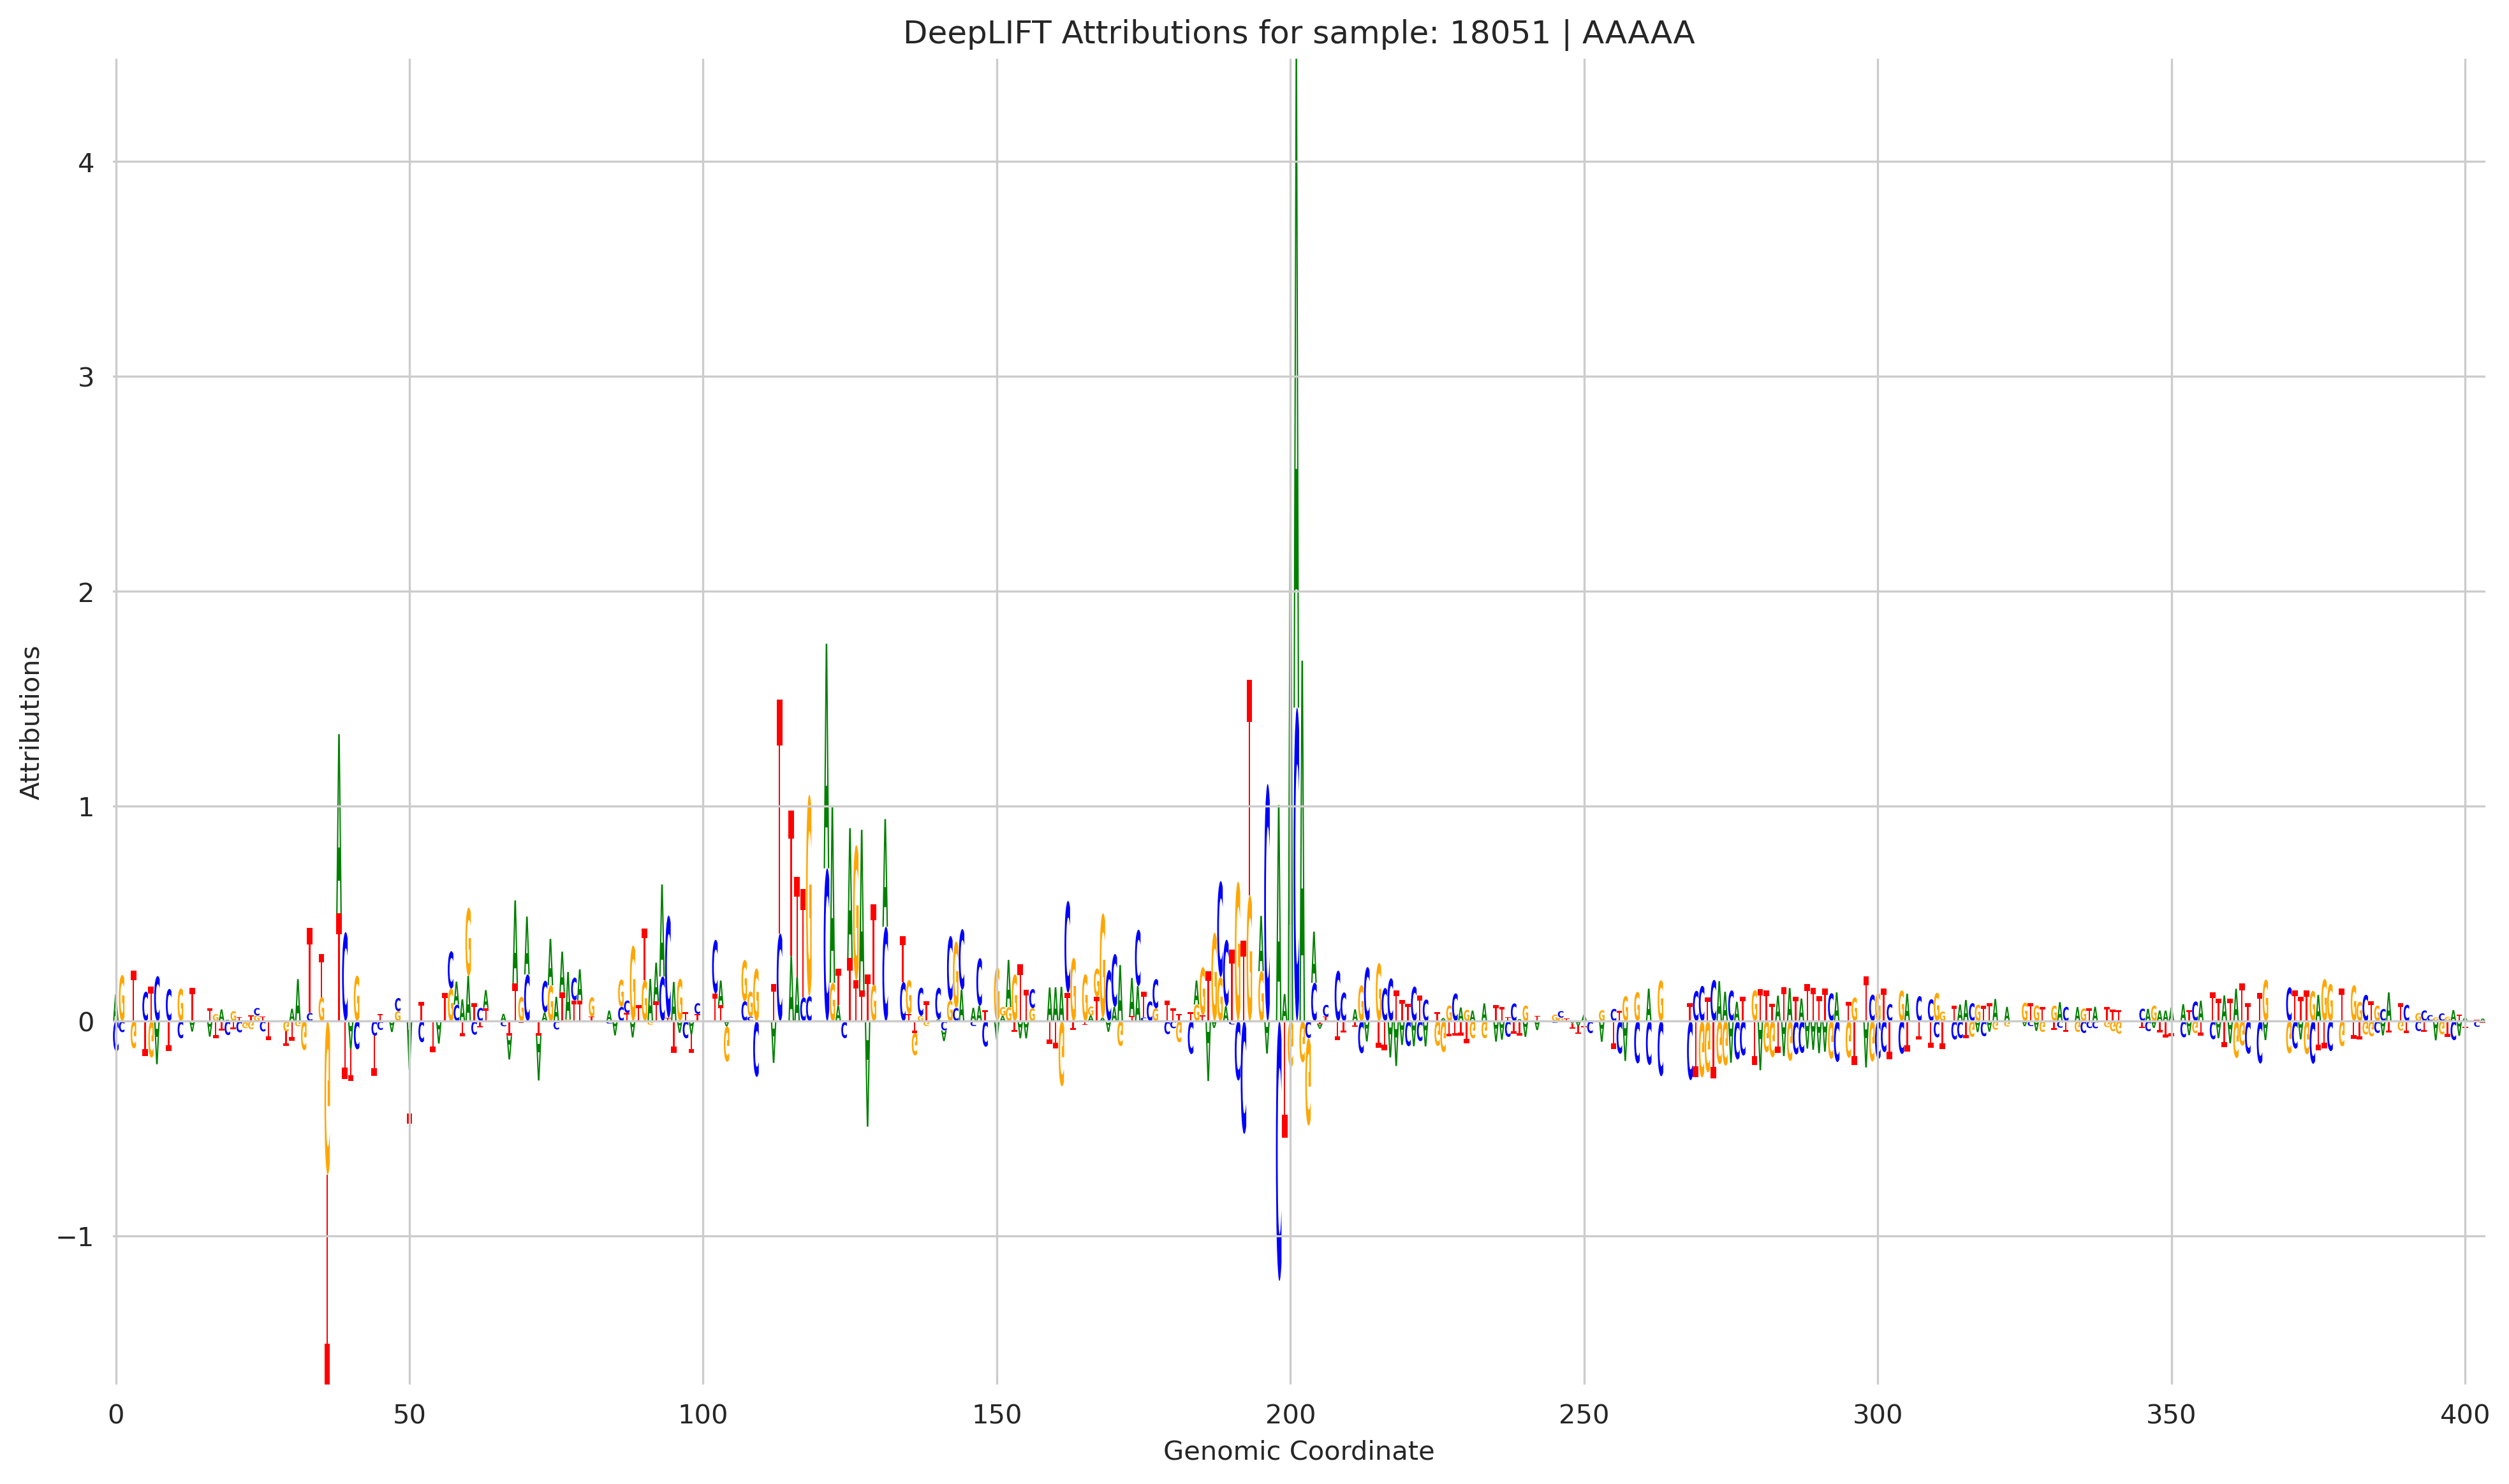

In [36]:
plot_seqlet(seqlets, attrs_list, sample_rank=1341, context_size=200)

In [17]:
from dataclasses import dataclass, field
from typing import List, Tuple

@dataclass
class PWM:
    """Container for position weight matrix data."""
    name: str
    matrix: np.ndarray
    bases: List[str] = field(default_factory=lambda: ['A', 'C', 'G', 'T'])
    
    def get_consensus(self, prob_threshold: float = 0.25) -> str:
        """Get consensus sequence from PWM using IUPAC ambiguity codes."""
        iupac_map = {
            'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T',
            'AC': 'M', 'AG': 'R', 'AT': 'W',
            'CG': 'S', 'CT': 'Y', 'GT': 'K',
            'ACG': 'V', 'ACT': 'H', 'AGT': 'D', 'CGT': 'B',
            'ACGT': 'N'
        }
        
        consensus = []
        for pos_probs in self.matrix.T:
            significant_bases = ''.join(b for b, p in zip(self.bases, pos_probs) 
                                     if p >= prob_threshold)
            significant_bases = ''.join(sorted(significant_bases))
            consensus.append(iupac_map.get(significant_bases, 'N'))
        return ''.join(consensus)

def parse_jaspar(jaspar_file: str) -> PWM:
    """Parse a JASPAR format PWM file."""
    with open(jaspar_file) as f:
        lines = f.readlines()
    
    if not lines or len(lines) != 5:
        raise ValueError("Invalid JASPAR format")
        
    name = lines[0].split()[0]
    matrix = []
    
    for line in lines[1:]:
        nums = line.split('[')[1].split(']')[0].strip().split()
        matrix.append([float(x) for x in nums])
    
    matrix = np.array(matrix)
    matrix = matrix / matrix.sum(axis=0)
    
    return PWM(name=name, matrix=matrix)

pwm = parse_jaspar(jaspar_file)
print(f"Loaded PWM: {pwm.name}")
print(f"Consensus sequence: {pwm.get_consensus()}")


Loaded PWM: >MA0148.1
Consensus sequence: TGTTTRCWYWG


In [18]:

def iupac_match(a: str, b: str) -> bool:
    """Check if two IUPAC nucleotide codes match."""
    iupac = {
        'A': {'A'},
        'C': {'C'},
        'G': {'G'},
        'T': {'T'},
        'R': {'A', 'G'},
        'Y': {'C', 'T'},
        'S': {'G', 'C'},
        'W': {'A', 'T'},
        'K': {'G', 'T'},
        'M': {'A', 'C'},
        'B': {'C', 'G', 'T'},
        'D': {'A', 'G', 'T'},
        'H': {'A', 'C', 'T'},
        'V': {'A', 'C', 'G'},
        'N': {'A', 'C', 'G', 'T'}
    }
    
    a = a.upper()
    b = b.upper()
    
    if a not in iupac or b not in iupac:
        raise ValueError(f"Invalid IUPAC code: {a if a not in iupac else b}")
        
    return bool(iupac[a] & iupac[b])


def levenshtein_iupac(seq1: str, seq2: str) -> int:
    """Calculate Levenshtein distance between two DNA sequences with IUPAC codes."""
    if not seq1: return len(seq2)
    if not seq2: return len(seq1)
    
    # Initialize lists instead of range objects
    previous_row = list(range(len(seq2) + 1))
    current_row = [0] * (len(seq2) + 1)
    
    for i, c1 in enumerate(seq1):
        current_row[0] = i + 1
        
        for j, c2 in enumerate(seq2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (not iupac_match(c1, c2))
            
            current_row[j + 1] = min(insertions, deletions, substitutions)
            
        previous_row, current_row = current_row, [0] * (len(seq2) + 1)  # Reset current_row
        
    return previous_row[-1]


def score_seqlet(pwm: PWM, seq: str) -> Tuple[float, int]:
    """Score a sequence against a PWM using IUPAC-aware Levenshtein distance."""
    from Bio import motifs
    from Bio.Seq import Seq
    
    seq_len = len(seq)
    pwm_width = pwm.matrix.shape[1]
    consensus = pwm.get_consensus()
    
    if seq_len < pwm_width:
        max_score = float('-inf')
        best_pos = 0
        for i in range(pwm_width - seq_len + 1):
            cons_slice = consensus[i:i+seq_len]
            raw_dist = levenshtein_iupac(seq, cons_slice)
            norm_score = 1 - (raw_dist / max(len(seq), len(cons_slice)))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos
    
    elif seq_len == pwm_width:
        raw_dist = levenshtein_iupac(seq, consensus)
        norm_score = 1 - (raw_dist / len(consensus))
        return norm_score, 0
    
    else:
        max_score = float('-inf')
        best_pos = 0
        for i in range(seq_len - pwm_width + 1):
            subseq = seq[i:i+pwm_width]
            raw_dist = levenshtein_iupac(subseq, consensus)
            norm_score = 1 - (raw_dist / len(consensus))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos

In [19]:

from tqdm.notebook import tqdm

scores = []
positions = []
for _, row in tqdm(seqlets.iterrows(), total=len(seqlets)):
    score, pos = score_seqlet(pwm, row['sequence'])
    scores.append(score)
    positions.append(pos)

# Add scores to dataframe
seqlets['pwm_score'] = scores
seqlets['pwm_position'] = positions

# Sort by score and display top matches
top_matches = seqlets.sort_values('pwm_score', ascending=False).head(10)
print("\nTop 10 PWM matches:")
print(top_matches[['sequence', 'pwm_score', 'pwm_position']])

  0%|          | 0/117192 [00:00<?, ?it/s]


Top 10 PWM matches:
       sequence  pwm_score  pwm_position
117129    TTACA        1.0             3
44018      ACAG        1.0             7
44013      ACAC        1.0             5
117136    TACAT        1.0             4
44012      ACAC        1.0             5
117188    ACACA        1.0             5
1          GCTT        1.0             5
44110     TTGCA        1.0             3
117148    ACATA        1.0             5
117149    ACTCA        1.0             5


In [20]:

def write_fasta(sequences, outfile):
    """Write sequences to FASTA format with auto-generated headers."""
    with open(outfile, 'w') as f:
        for i, seq in enumerate(sequences):
            f.write(f'>seq_{i+1}\n{seq}\n')


def save_seqlets(seqlets, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    pos_seqlets = seqlets[seqlets['attribution'] > 0].reset_index(drop=True)
    neg_seqlets = seqlets[seqlets['attribution'] < 0].reset_index(drop=True)

    pos_seqlets.to_csv(os.path.join(output_dir, "positive_seqlets.csv"), 
                       index=False)
    neg_seqlets.to_csv(os.path.join(output_dir, "negative_seqlets.csv"), 
                       index=False)
    
    candidate_motifs = pos_seqlets['sequence'].tolist()
    write_fasta(
        candidate_motifs, 
        outfile=os.path.join(output_dir, "positive_seqlets.fa")
    )



save_seqlets(seqlets, f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/")



In [21]:
# run python levenstein.py --jaspar motif.jaspar --seqlets positive_seqlets.csv --output lev_pwm.csv
os.system(f"python /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py --jaspar /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/{model}.jaspar --seqlets /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/positive_seqlets.csv --output /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/lev_pwm.csv")

2025-02-26 12:16:23,292 - INFO - Loading PWM from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/FOXA1.jaspar
2025-02-26 12:16:23,304 - INFO - Consensus sequence: TGTTTRCWYWG
2025-02-26 12:16:23,304 - INFO - Loading seqlets from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/FOXA1_22Rv1/positive_seqlets.csv
2025-02-26 12:16:23,946 - INFO - Scoring seqlets
100%|██████████| 70874/70874 [00:37<00:00, 1904.04it/s]
2025-02-26 12:17:01,515 - INFO - Saving 70874 matches to /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/FOXA1_22Rv1/lev_pwm.csv
2025-02-26 12:17:02,628 - INFO - Summary statistics:
2025-02-26 12:17:02,636 - INFO - Mean score: 0.663
2025-02-26 12:17:02,643 - INFO - Max score: 1.000
2025-02-26 12:17:02,643 - INFO - Number of matches above threshold: 70874


0

In [22]:
min_seqlet = 5
receptor_name = model.split("_")[0]
dir = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}"
os.system(f"Rscript /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/posthoc.R {min_seqlet} {receptor_name} {dir}")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 70874 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sequence
dbl (10): example_idx, start, end, attribution, p-value, pwm_score, pwm_posi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70874 Columns: 8
── Column specification ───────────────────────────────────────────────────────

# A tibble: 16,547 × 2
   sequence     n
   <chr>    <int>
 1 AAAAA      792
 2 AAAAAA     641
 3 AAACA      368
 4 TAAAAA     213
 5 TAAACA     177
 6 AAACAA     172
 7 AAAAAC     168
 8 GTAAA      167
 9 TATTT      161
10 AAAAAAA    160
# ℹ 16,537 more rows


Warning message:
Removed 28865 rows containing missing values (`geom_point()`). 
Warning message:
Removed 28865 rows containing missing values (`geom_point()`). 
`geom_smooth()` using formula = 'y ~ x'


Rows: 2,470
Columns: 15
$ example_idx          <dbl> 19864, 12174, 9082, 19964, 3877, 10334, 7326, 900…
$ start                <dbl> 2090, 2450, 2143, 2463, 1685, 1939, 1756, 2164, 2…
$ end                  <dbl> 2099, 2460, 2154, 2475, 1696, 1947, 1770, 2188, 2…
$ attribution.x        <dbl> 51.62927, 37.68594, 37.62618, 37.42695, 34.46132,…
$ `p-value.x`          <dbl> 4.122382e-08, 1.915528e-06, 1.421178e-05, 1.00927…
$ sequence             <chr> "GTAAAGAAA", "GTAAAAACGC", "CGTATTTACTA", "GTTAAC…
$ pwm_score.x          <dbl> 0.5555556, 0.5000000, 0.5454545, 0.6363636, 0.454…
$ pwm_position.x       <dbl> 1, 1, 0, 0, 0, 2, 2, 2, 5, 0, 3, 9, 0, 0, 1, 0, 0…
$ attribution.y        <dbl> 51.62927, 37.68594, 37.62618, 37.42695, 34.46132,…
$ `p-value.y`          <dbl> 4.122382e-08, 1.915528e-06, 1.421178e-05, 1.00927…
$ pwm_score.y          <dbl> 0.5555556, 0.5000000, 0.5454545, 0.6363636, 0.454…
$ pwm_position.y       <dbl> 1, 1, 0, 0, 0, 2, 2, 2, 5, 0, 3, 9, 0, 0, 1, 0, 0…
$ levenshtein_sc

0

In [ ]:
print(atac_list)
plt.plot(atac_list)
plt.show()

[[ 0.00048401  0.00051847  0.00167091 ...  0.0010055   0.00087591
   0.00073707]
 [ 0.00937911  0.01149262  0.01249768 ...  0.02483942  0.03384278
   0.02996477]
 [ 0.00274733  0.00349753  0.00334753 ... -0.00395112 -0.00447653
  -0.00442938]
 ...
 [-0.00180475 -0.00176143 -0.00176469 ...  0.0001113   0.0001389
   0.00016294]
 [ 0.00112388  0.0016288   0.00185774 ... -0.00043557 -0.00025144
  -0.0003941 ]
 [ 0.00561467  0.00554422  0.00658033 ...  0.00406182  0.00383102
   0.00376731]]


 ...]

Error in callback <function _draw_all_if_interactive at 0x7fe29c408a60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 